##3. Influencer Ranking Data Exploration

This notebook examines the high-level influencer metrics used to assess market value and ranking, focusing on relationships between follower counts, engagement, and influence scores.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import glob
from typing import List

# --- Utility Functions from ingest_public_data.py ---

# Define Kaggle Dataset ID for Ranking data
KAGGLE_DATASETS = {"ranking_data": "whenamancodes/top-200-influencers-crushing-on-instagram"}

def find_csv_in_path(path: str) -> str:
    """Finds the first CSV file in the downloaded Kaggle path."""
    csv_files = glob.glob(os.path.join(path, '**', '*.csv'), recursive=True)
    if not csv_files:
        raise FileNotFoundError(f"No CSV file found in the downloaded path: {path}")
    return csv_files[0]



In [59]:
def normalize_metric_value(val):
    """
    Convert Instagram-style metric values to integers.
    Handles: 930k, 1.7m, 12.4K, 900, 1,200, 3.2B, etc.
    Returns np.nan for invalid or empty values.
    """
    if pd.isna(val):
        return np.nan

    # Convert to string
    s = str(val).strip().lower()

    # Remove commas
    s = s.replace(",", "")

    # Case 1: Pure numeric digits
    if s.replace('.', '', 1).isdigit():
        return float(s)

    # Case 2: Ends with k/m/b suffix
    multiplier = 1
    if s.endswith("k"):
        multiplier = 1e3
        s = s[:-1]
    elif s.endswith("m"):
        multiplier = 1e6
        s = s[:-1]
    elif s.endswith("b"):
        multiplier = 1e9
        s = s[:-1]

    # If the remaining part is not numeric, return NaN
    try:
        return float(s) * multiplier
    except:
        return np.nan


In [60]:
def download_and_load(dataset_name: str) -> pd.DataFrame:
    """Downloads a Kaggle dataset and loads the primary CSV file."""
    dataset_id = KAGGLE_DATASETS[dataset_name]
    print(f"--- Starting Download: {dataset_id} ---")
    download_path = kagglehub.dataset_download(dataset_id)
    csv_file_path = find_csv_in_path(download_path)
    df = pd.read_csv(csv_file_path, low_memory=False)
    print(f"Loaded {len(df)} records.")
    return df

# Load the data
ranking_df = download_and_load("ranking_data")

--- Starting Download: whenamancodes/top-200-influencers-crushing-on-instagram ---
Loaded 200 records.


In [61]:
df = ranking_df.copy()

In [62]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [63]:
df.describe(include='all')

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
count,200.000000,200,200.000000,200,200,200,200.000000,200,200,137
unique,NaN,200,NaN,172,134,121,NaN,170,116,25
top,NaN,\ncristiano,NaN,33.6m,1.1m,10.0k,NaN,1.7m,1.5b,United States
freq,NaN,1,NaN,3,9,11,NaN,6,10,65
mean,100.500000,NaN,81.850000,NaN,NaN,NaN,0.019160,NaN,NaN,NaN
std,57.879185,NaN,8.875323,NaN,NaN,NaN,0.032577,NaN,NaN,NaN
min,1.000000,NaN,22.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,50.750000,NaN,80.000000,NaN,NaN,NaN,0.004000,NaN,NaN,NaN
50%,100.500000,NaN,84.000000,NaN,NaN,NaN,0.009500,NaN,NaN,NaN
75%,150.250000,NaN,86.000000,NaN,NaN,NaN,0.017250,NaN,NaN,NaN


In [64]:
df = df.rename(columns={
    'Channel Info': 'username',
    'Influence Score': 'market_influence_score',
    'Posts': 'total_posts_count',
    'Avg. Likes': 'account_avg_likes',
    '60-Day Eng Rate': 'engagement_rate_60d'
})

In [65]:
df.dtypes

Rank                        int64
username                   object
market_influence_score      int64
Followers                  object
account_avg_likes          object
total_posts_count          object
engagement_rate_60d       float64
New Post Avg. Likes        object
Total Likes                object
Country Or Region          object
dtype: object

In [68]:
# Correct username string values
df['username'] = df['username'].astype(str).str.replace(r'[\n\r\t]', '', regex=True).str.strip()

In [69]:
df.loc[df['username'].isna()].shape[0]

0

In [70]:
# Normalize the metric values
for col in ['Total Likes', 'Followers', 'total_posts_count', 'market_influence_score', 'account_avg_likes', 'engagement_rate_60d', 'New Post Avg. Likes']:
    df[col] = df[col].apply(normalize_metric_value)

In [72]:
print("NaN Amount:")
for col in ['Total Likes', 'Followers', 'total_posts_count', 'market_influence_score', 'account_avg_likes', 'engagement_rate_60d', 'New Post Avg. Likes']:
    print(f"{col}: {df.loc[df[col].isna()].shape[0]}")

NaN Amount:
Total Likes: 0
Followers: 0
total_posts_count: 0
market_influence_score: 0
account_avg_likes: 0
engagement_rate_60d: 0
New Post Avg. Likes: 0


In [74]:
df.dtypes

Rank                        int64
username                   object
market_influence_score    float64
Followers                 float64
account_avg_likes         float64
total_posts_count         float64
engagement_rate_60d       float64
New Post Avg. Likes       float64
Total Likes               float64
Country Or Region          object
dtype: object

In [75]:
df

,Rank,username,market_influence_score,Followers,account_avg_likes,total_posts_count,engagement_rate_60d,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92.0,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91.0,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90.0,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,4,selenagomez,93.0,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91.0,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63.0,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,danbilzerian,84.0,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,raisa6690,80.0,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,luansantana,79.0,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


In [76]:
df.describe(include='all')

,Rank,username,market_influence_score,Followers,account_avg_likes,total_posts_count,engagement_rate_60d,New Post Avg. Likes,Total Likes,Country Or Region
count,200.000000,200,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,2.000000e+02,2.000000e+02,137
unique,NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
top,NaN,cristiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
mean,100.500000,NaN,81.850000,7.849100e+07,1.785050e+06,3460.425000,0.019160,1.224083e+06,3.644949e+09,NaN
std,57.879185,NaN,8.875323,7.492015e+07,2.192133e+06,3327.882197,0.032577,1.857624e+06,5.563069e+09,NaN
min,1.000000,NaN,22.000000,3.340000e+07,6.350000e+04,20.000000,0.000000,0.000000e+00,2.280000e+07,NaN
25%,50.750000,NaN,80.000000,4.067500e+07,4.990500e+05,938.250000,0.004000,2.187750e+05,1.075000e+09,NaN
50%,100.500000,NaN,84.000000,5.095000e+07,1.100000e+06,2100.000000,0.009500,5.671500e+05,2.050000e+09,NaN
75%,150.250000,NaN,86.000000,7.050000e+07,2.125000e+06,5025.000000,0.017250,1.300000e+06,4.025000e+09,NaN


In [81]:
df = df.drop(columns=['Rank', 'Country Or Region'], errors='ignore')
df = df.dropna(subset=['market_influence_score', 'Followers'])

print(f"Cleaned Ranking data shape: {df.shape}")

Cleaned Ranking data shape: (200, 8)


In [82]:
# Load and clean the Ranking data
print(df.head())
print(df.describe())

      username  market_influence_score    Followers  account_avg_likes  \
0    cristiano                    92.0  485200000.0          8700000.0   
1  kyliejenner                    91.0  370700000.0          8200000.0   
2     leomessi                    90.0  363900000.0          6700000.0   
3  selenagomez                    93.0  348800000.0          6100000.0   
4      therock                    91.0  339400000.0          1800000.0   

   total_posts_count  engagement_rate_60d  New Post Avg. Likes   Total Likes  
0             3400.0                0.013            6300000.0  2.910000e+10  
1             7000.0                0.014            5000000.0  5.740000e+10  
2              915.0                0.010            3500000.0  6.100000e+09  
3             1900.0                0.005            1700000.0  1.140000e+10  
4             6800.0                0.003             932000.0  1.260000e+10  
       market_influence_score     Followers  account_avg_likes  \
count          

In [83]:
df

,username,market_influence_score,Followers,account_avg_likes,total_posts_count,engagement_rate_60d,New Post Avg. Likes,Total Likes
0,cristiano,92.0,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10
1,kyliejenner,91.0,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10
2,leomessi,90.0,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09
3,selenagomez,93.0,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10
4,therock,91.0,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10
...,...,...,...,...,...,...,...,...
195,khabib_nurmagomedov,63.0,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09
196,danbilzerian,84.0,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09
197,raisa6690,80.0,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08
198,luansantana,79.0,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08


In [84]:
# Configure plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

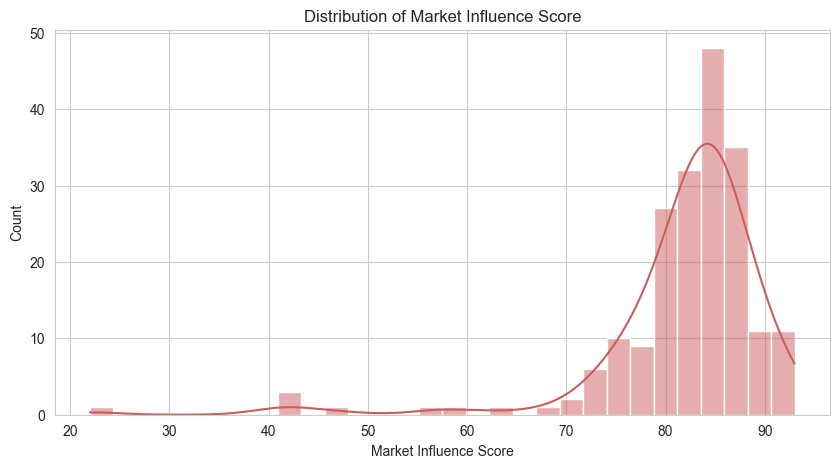

In [85]:
plt.figure(figsize=(10, 5))
sns.histplot(df['market_influence_score'], bins=30, kde=True, color='indianred')
plt.title('Distribution of Market Influence Score')
plt.xlabel('Market Influence Score')
plt.ylabel('Count')
plt.show()

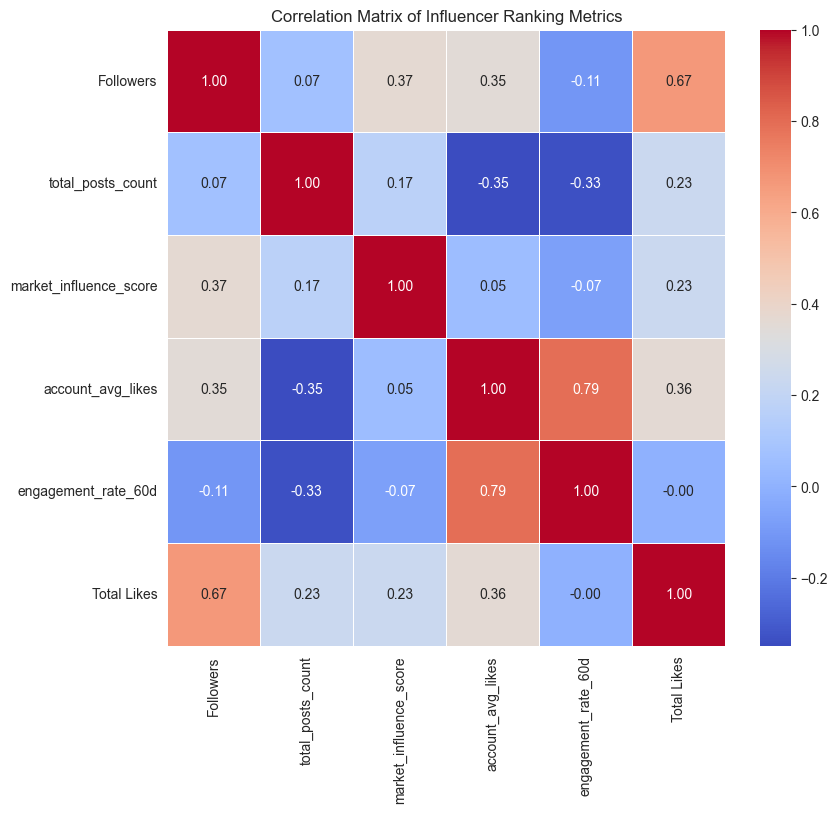


Key Insights from Correlation (vs. Market Influence Score):
market_influence_score    1.000000
Followers                 0.365428
Total Likes               0.234987
total_posts_count         0.168287
account_avg_likes         0.048502
engagement_rate_60d      -0.072460
Name: market_influence_score, dtype: float64


In [87]:
# Select key numerical columns for correlation analysis
rank_numeric_cols = ['Followers', 'total_posts_count', 'market_influence_score',
                     'account_avg_likes', 'engagement_rate_60d', 'Total Likes']

correlation_matrix = df[rank_numeric_cols].corr()

plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Influencer Ranking Metrics')
plt.show()

print("\nKey Insights from Correlation (vs. Market Influence Score):")
print(correlation_matrix['market_influence_score'].sort_values(ascending=False))
# High positive correlation with Followers and Total Likes is expected, as scale drives influence.
